# Libraries 

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers

# Data Loading

In [2]:
# load the data
data = pd.read_csv('KeyFacialPoints.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [4]:
data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [6]:
# Conversion to numpy arrays 

data['Image'] = data['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep = ' ').reshape(96,96))
data['Image'][1].shape

(96, 96)

# Data Visualization

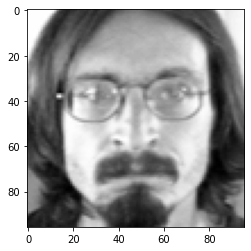

In [7]:
# image visualization 
i = np.random.randint(1, len(data))
plt.imshow(data['Image'][i], cmap='gray')

<Figure size 432x288 with 0 Axes>

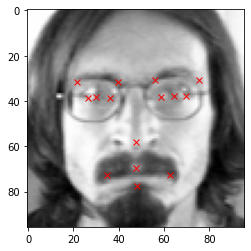

<Figure size 432x288 with 0 Axes>

In [8]:
# key points in a image


plt.imshow(data['Image'][i], cmap='gray')
for j in range(1,31,2):
    plt.plot(data.loc[i][j-1],data.loc[i][j],'rx')
plt.figure()


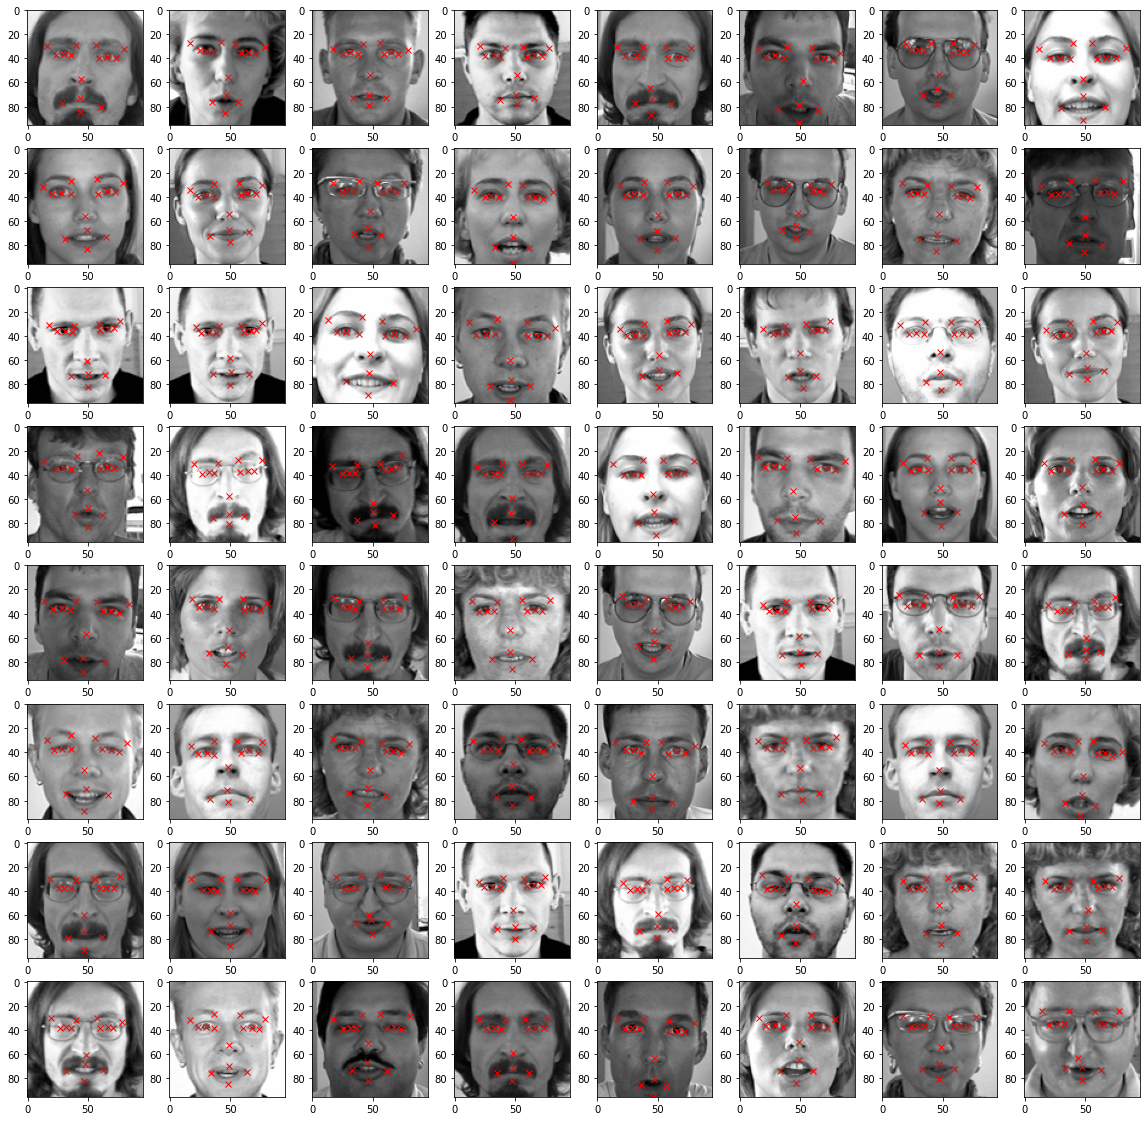

In [9]:
#images in a grid format 

figure = plt.figure(figsize= (20,20))
i = np.random.randint(1, len(data))
for i in range(64):
    ax = figure.add_subplot(8,8,i+1)
    image = plt.imshow(data['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(data.loc[i][j-1],data.loc[i][j],'rx')

# Image Augmentation 

In [10]:
# To increase the size of the dataset we do image augmentation
import copy 
data2 = copy.copy(data)


In [11]:
col = data2.columns[:-1]
col

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [12]:
data2['Image'][1]

array([[219, 215, 204, ...,  92,  88,  84],
       [222, 219, 220, ...,  92,  88,  86],
       [231, 224, 212, ...,  77,  80,  84],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

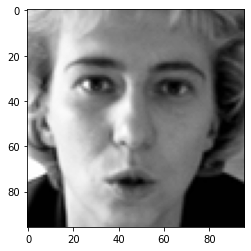

In [13]:
plt.imshow(data2['Image'][1],cmap= 'gray')

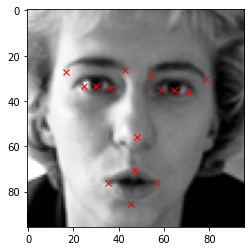

In [14]:
plt.figure()
i= 1
plt.imshow(data2['Image'][i],cmap= 'gray')
for j in range(1,31,2):
    plt.plot(data2.loc[i][j-1], data2.loc[i][j],'rx')

# Image flipping on horizontal axis 

In [15]:
#Image flipping

data2['Image'] = data2['Image'].apply(lambda x: np.flip(x, axis =1))

In [16]:
data2['Image'][1]

array([[ 84,  88,  92, ..., 204, 215, 219],
       [ 86,  88,  92, ..., 220, 219, 222],
       [ 84,  80,  77, ..., 212, 224, 231],
       ...,
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1],
       [  1,   1,   1, ...,   1,   1,   1]])

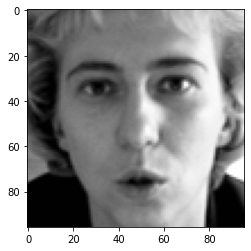

In [17]:
plt.imshow(data2['Image'][1],cmap ='gray')

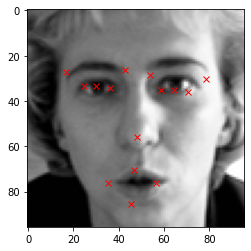

In [18]:
plt.figure()
i= 1
plt.imshow(data2['Image'][i],cmap= 'gray')
for j in range(1,31,2):
    plt.plot(data2.loc[i][j-1], data2.loc[i][j],'rx')

In [19]:
# X coordinate will change , Y coordinate will remain same
for i in range(len(col)):
    if i%2 == 0: 
        data2[col[i]] = data2[col[i]].apply(lambda x: 96.0 - float(x))
        

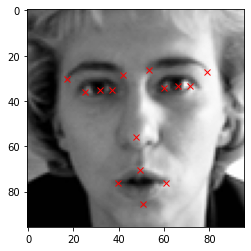

In [20]:
plt.figure()
i= 1
plt.imshow(data2['Image'][i],cmap= 'gray')
for j in range(1,31,2):
    plt.plot(data2.loc[i][j-1], data2.loc[i][j],'rx')

# Increasing the brightness of image

In [21]:
import random

databright = copy.copy(data)
databright['Image'] = databright['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))


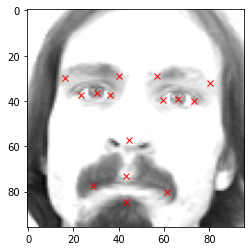

In [22]:
# Let's view a sample image with increased brightness 
plt.imshow(databright['Image'][0], cmap = 'gray')
for j in range(1,31,2):
        plt.plot(databright.loc[0][j-1], databright.loc[0][j], 'rx')

# Decreasing the brightness of the image

In [23]:
data_dark = copy.copy(data)
data_dark['Image'] = data_dark['Image'].apply(lambda x:np.clip(random.uniform(0, 0.2) * x, 0.0, 255.0))


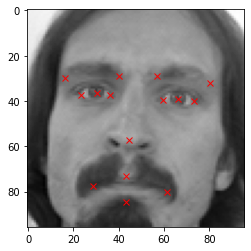

In [24]:
# Let's view a sample image with decreased brightness decreased image
plt.imshow(data_dark['Image'][0], cmap = 'gray')
for j in range(1,31,2):
        plt.plot(data_dark.loc[0][j-1], data_dark.loc[0][j], 'rx')

In [25]:
# Concatenate the new dataset with teh original dataset 
datanew = np.concatenate((data,data2,databright,data_dark))

In [26]:
np.random.shuffle(datanew)
datanew.shape 

(8560, 31)

#  Train data 

In [27]:
image = datanew[:,30]
image = image/255.0


In [28]:
#create an empty array of shape (6420,96,96,1) to train the model
X = np.empty((len(image),96,96,1))
X.shape

(8560, 96, 96, 1)

In [29]:
for i in  range(len(image)):
    X[i,] = np.expand_dims(image[i],axis = 2)
X.shape

(8560, 96, 96, 1)

In [30]:
#convert it to float
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [31]:
#output variables 
Y = datanew[:,:30]
Y = np.asarray(Y).astype(np.float32)
Y.shape

(8560, 30)

In [32]:
# split the data into training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)



In [33]:
X_train.shape

(7704, 96, 96, 1)

In [34]:
X_test.shape

(856, 96, 96, 1)

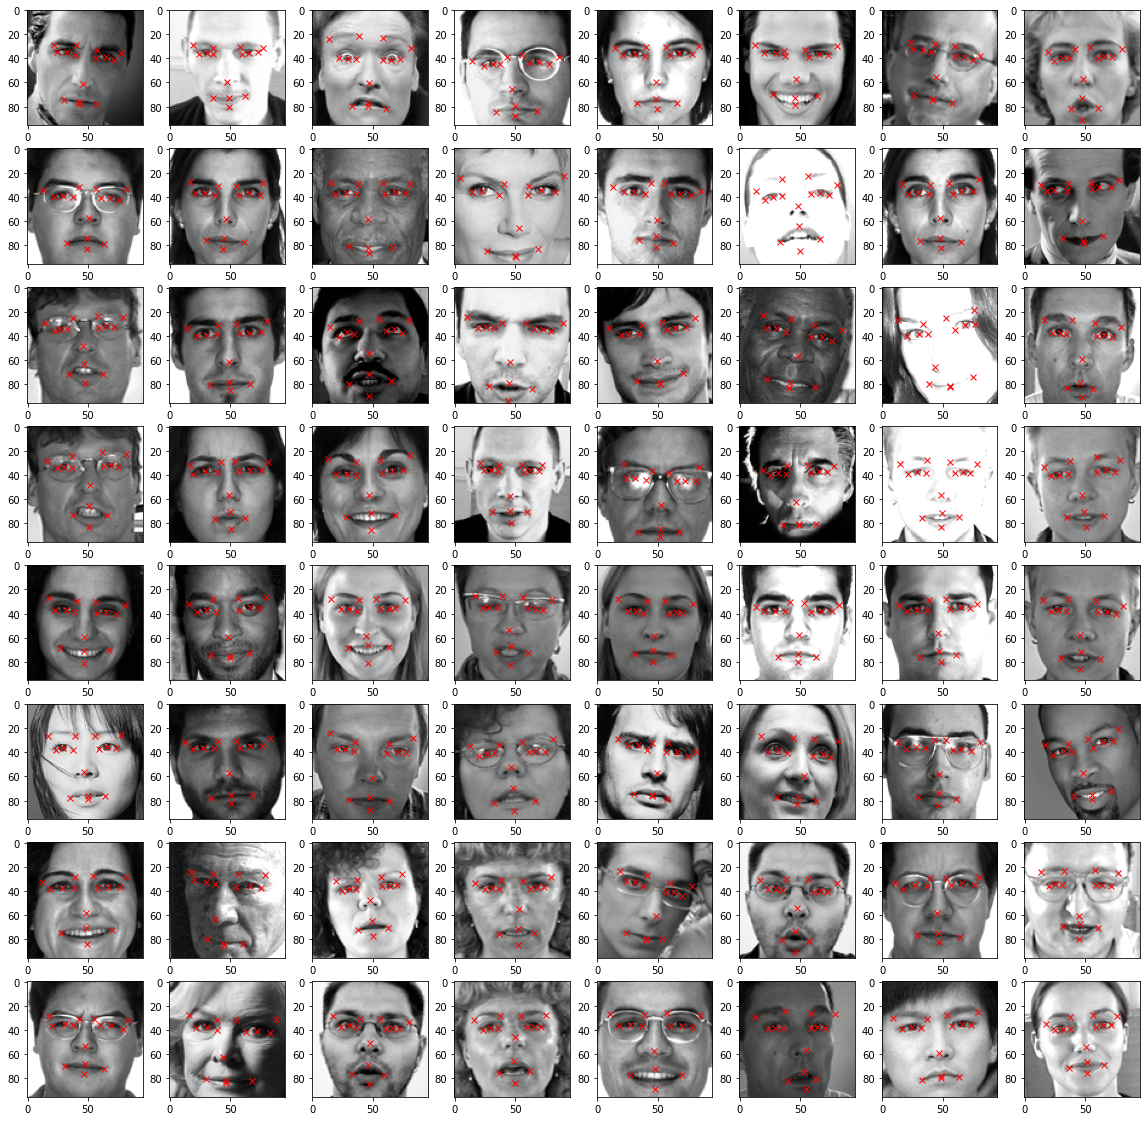

In [35]:
fig = plt.figure(figsize=(20,20))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    image = plt.imshow(X_train[i].reshape(96,96),cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(Y_train[i][j-1],Y_train[i][j],'rx')
    

# Model creation 

In [36]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X
    

In [37]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

# Training model

In [38]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [39]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [40]:
history = model.fit(X_train, Y_train, batch_size = 500, epochs= 100, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/100
15/15 [==============================] - 242s 16s/step - loss: 940.7319 - accuracy: 0.3047 - val_loss: 2315.6377 - val_accuracy: 0.6917

Epoch 00001: val_loss improved from inf to 2315.63770, saving model to weights.hdf5
Epoch 2/100
15/15 [==============================] - 231s 15s/step - loss: 139.5195 - accuracy: 0.4281 - val_loss: 1931.7283 - val_accuracy: 0.6917

Epoch 00002: val_loss improved from 2315.63770 to 1931.72827, saving model to weights.hdf5
Epoch 3/100
15/15 [==============================] - 218s 14s/step - loss: 102.4001 - accuracy: 0.6421 - val_loss: 1644.4426 - val_accuracy: 0.1606

Epoch 00003: val_loss improved from 1931.72827 to 1644.44263, saving model to weights.hdf5
Epoch 4/100
15/15 [==============================] - 238s 16s/step - loss: 86.4082 - accuracy: 0.6116 - val_loss: 1367.2244 - val_accuracy: 0.4767

Epoch 00004: val_loss improved from 1644.44263 to 1367.22437, saving model to weights.hdf5
Epoch 5/100
15/15 [=============================

KeyboardInterrupt: 

# Model performance

In [41]:
# Evaluate trained model

result = model.evaluate(X_test,Y_test)
print("Accuracy : {}".format(result[1]))

27/27 [==============================] - 5s 179ms/step - loss: 41.2636 - accuracy: 0.7091
Accuracy : 0.7091121673583984


In [44]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

In [45]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 6.423676101309982


In [46]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = col)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,63.680965,35.769188,31.965117,38.260727,58.268425,36.716087,69.226761,36.331539,37.552364,38.081043,...,47.635002,49.605022,62.397121,68.855011,37.429146,70.474571,49.013546,63.640713,49.374371,75.044159
1,64.528214,33.753357,29.237410,41.262859,57.100739,36.622219,72.458519,33.438087,36.606892,40.988071,...,49.231285,58.616383,69.990135,73.967133,39.706932,80.509209,53.814739,75.751045,54.935555,81.345207
2,65.425095,36.486763,29.628740,36.692284,59.044060,37.440308,71.997620,37.381104,36.010937,37.267139,...,47.119423,56.302021,61.797707,75.800232,33.694641,75.904587,47.218487,71.403328,47.330482,82.713890
3,66.653862,37.997902,28.908815,37.811874,60.099442,38.864262,73.362427,39.091965,35.632938,38.560314,...,48.669762,56.491817,62.830185,77.548782,32.866879,77.610497,47.871918,72.535538,47.951447,85.310982
4,61.836212,36.866764,35.076126,33.825901,55.591537,37.504322,66.137115,38.319660,40.091312,35.086262,...,45.023895,56.250431,53.215595,71.690460,30.682028,68.675331,42.030796,70.105225,41.098972,75.215782


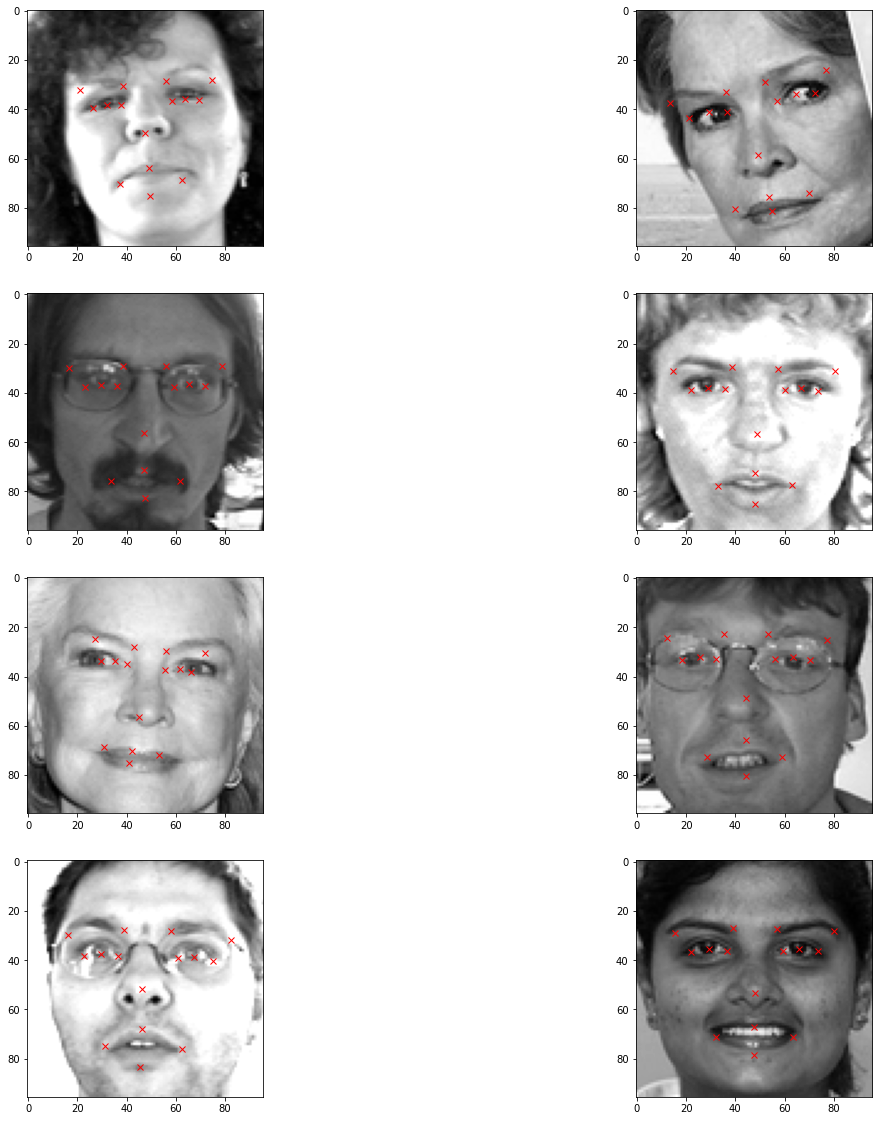

In [47]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')